# CAPSTONE PRJOECT

In this project, we wanted to predict the item prices for an e-commerce based store based on a training and testing data sets. Various features are used to get the accurate Machine Learning model and predictions based on those models.

In [1]:
#importing the relevant libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline


In [2]:
#Loading the train dataset and observing its head

df=pd.read_csv(r"C:\Users\HP\Downloads\Final Hackathon\train.csv")
df.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


# Information of data

In [3]:
#Loading the shape of data

df.shape

(15730, 16)

In [4]:
#Loading the information of data type of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15730 entries, 0 to 15729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15730 non-null  int64  
 1   title       15730 non-null  object 
 2   Rating      15730 non-null  float64
 3   maincateg   15204 non-null  object 
 4   platform    15730 non-null  object 
 5   price1      15730 non-null  int64  
 6   actprice1   15730 non-null  int64  
 7   Offer %     15730 non-null  object 
 8   norating1   15052 non-null  float64
 9   noreviews1  15152 non-null  float64
 10  star_5f     15142 non-null  float64
 11  star_4f     15191 non-null  float64
 12  star_3f     15499 non-null  float64
 13  star_2f     15730 non-null  int64  
 14  star_1f     15730 non-null  int64  
 15  fulfilled1  15730 non-null  int64  
dtypes: float64(6), int64(6), object(4)
memory usage: 1.9+ MB


In [5]:
#Observing  the numerical description of data

df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
count,15730.000000,15730.000000,15730.000000,15730.000000,15052.000000,15152.000000,15142.000000,15191.000000,15499.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,3057.660776,423.976307,1585.239466,655.923310,357.260662,155.085188,275.500572,0.601526
std,6080.166276,0.298440,649.409586,1240.900227,11846.965689,1768.230384,6177.476241,2855.735531,1402.246610,558.650254,958.589075,0.489600
min,3.000000,0.000000,69.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,63.000000,9.000000,30.000000,12.000000,7.000000,3.000000,6.000000,0.000000
50%,10458.500000,4.000000,474.000000,999.000000,308.000000,44.000000,150.000000,60.000000,34.000000,17.000000,30.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1526.000000,215.000000,788.000000,300.000000,172.000000,77.000000,140.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000


In [6]:
# Seeing all the columns of data

df.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'price1', 'actprice1',
       'Offer %', 'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f',
       'star_2f', 'star_1f', 'fulfilled1'],
      dtype='object')

# Dealing with null values

In [7]:
# Filling all columns with null numerical attributes with mean of the existing values.  

data_filled=df['norating1'].fillna(df['norating1'].mean())
df['norating1']=data_filled
data_filled1=df['noreviews1'].fillna(df['noreviews1'].mean())
df['noreviews1']=data_filled
data_filled2=df['star_5f'].fillna(df['star_5f'].mean())
df['star_5f']=data_filled
data_filled3=df['star_4f'].fillna(df['star_4f'].mean())
df['star_4f']=data_filled
data_filled4=df['star_3f'].fillna(df['star_3f'].mean())
df['star_3f']=data_filled

df.isnull().sum()



id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1       0
noreviews1      0
star_5f         0
star_4f         0
star_3f         0
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [8]:
df['maincateg'].value_counts()

Women    8781
Men      6423
Name: maincateg, dtype: int64

We observe that the orders by women customers are little more in number than men.

In [9]:
#Replacing the column name 'maincateg' with 'gender'

df.rename(columns = {'maincateg':'gender'}, inplace = True)
df.head()

,id,title,Rating,gender,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,38.0,38.0,38.0,38.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,531.0,531.0,531.0,531.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,17.0,17.0,17.0,17.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,46413.0,46413.0,46413.0,46413.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,77.0,77.0,77.0,77.0,7,7,1


In [10]:
#Observing offer% column's datatype

df["Offer %"].dtypes

dtype('O')

In [11]:
#Converting data from offer% to a list for processing

l=list(df["Offer %"])
l

['30.13%',
 '50.03%',
 '45.01%',
 '15.85%',
 '40.02%',
 '28.06%',
 '50.05%',
 '83.91%',
 '45.05%',
 '10.01%',
 '0.00%',
 '53.89%',
 '50.08%',
 '50.04%',
 '45.01%',
 '50.03%',
 '62.06%',
 '60.06%',
 '60.06%',
 '50.05%',
 '52.71%',
 '64.93%',
 '67.81%',
 '0.68%',
 '30.01%',
 '66.78%',
 '37.59%',
 '40.04%',
 '45.01%',
 '50.97%',
 '50.05%',
 '60.06%',
 '64.68%',
 '60.12%',
 '24.02%',
 '21.72%',
 '34.13%',
 '59.96%',
 '18.02%',
 '68.78%',
 '47.45%',
 '37.25%',
 '40.03%',
 '5.89%',
 '57.06%',
 '37.55%',
 '55.99%',
 '30.46%',
 '83.21%',
 '68.47%',
 '55.91%',
 '40.04%',
 '50.05%',
 '61.06%',
 '52.71%',
 '50.75%',
 '28.59%',
 '33.87%',
 '60.06%',
 '54.99%',
 '50.03%',
 '72.02%',
 '53.89%',
 '80.00%',
 '50.03%',
 '40.08%',
 '45.35%',
 '42.89%',
 '65.07%',
 '20.00%',
 '36.87%',
 '20.04%',
 '61.96%',
 '60.03%',
 '57.06%',
 '60.16%',
 '25.79%',
 '68.37%',
 '43.01%',
 '45.05%',
 '54.11%',
 '10.01%',
 '45.02%',
 '52.55%',
 '25.03%',
 '30.06%',
 '70.07%',
 '79.60%',
 '40.28%',
 '50.05%',
 '22.66%',
 '

In [12]:
#creating a for loop to replace % in the list and seeing the head of dataframe
i=0

for str in l:
    df.loc[i,("Offer %")]=str.replace("%","")
    i=i+1
    
df.head()
    

,id,title,Rating,gender,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13,38.0,38.0,38.0,38.0,38.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03,531.0,531.0,531.0,531.0,531.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01,17.0,17.0,17.0,17.0,17.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85,46413.0,46413.0,46413.0,46413.0,46413.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02,77.0,77.0,77.0,77.0,77.0,7,7,1


In [13]:
#conversion of offer% string to float datatype
df['Offer %'].apply(lambda x: float(x))


0        30.13
1        50.03
2        45.01
3        15.85
4        40.02
         ...  
15725    52.71
15726    50.00
15727    34.07
15728    50.01
15729    45.02
Name: Offer %, Length: 15730, dtype: float64

# Plotting different graphs for further analysis

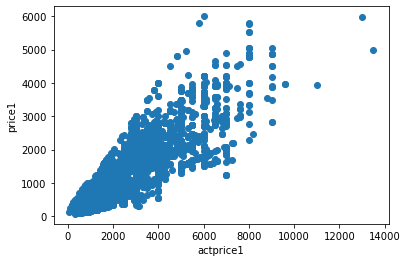

In [14]:
x=df['actprice1']
y=df['price1']
plt.scatter(x,y)
plt.xlabel("actprice1")
plt.ylabel("price1")
plt.show()

# Encoding for Categorical Data in maincateg and platform

In [15]:
#Encoding the gender column values

df1=pd.get_dummies(df,columns=['gender'],prefix=[''])
df1.head()

,id,title,Rating,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,_Men,_Women
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Flipkart,698,999,30.13,38.0,38.0,38.0,38.0,38.0,3,3,0,0,1
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Flipkart,999,1999,50.03,531.0,531.0,531.0,531.0,531.0,29,73,1,1,0
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Flipkart,2749,4999,45.01,17.0,17.0,17.0,17.0,17.0,1,0,1,0,1
3,495,Men Black Sports Sandal,4.2,Flipkart,518,724,15.85,46413.0,46413.0,46413.0,46413.0,46413.0,701,4595,1,1,0
4,16408,Men Green Sports Sandal,3.9,Flipkart,1379,2299,40.02,77.0,77.0,77.0,77.0,77.0,7,7,1,1,0


In [16]:
#Encoding the gender column values

df2=pd.get_dummies(df1,columns=['platform'],prefix=[''])
df2.head()

,id,title,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,_Men,_Women,_Amazon,_Flipkart
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,698,999,30.13,38.0,38.0,38.0,38.0,38.0,3,3,0,0,1,0,1
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,999,1999,50.03,531.0,531.0,531.0,531.0,531.0,29,73,1,1,0,0,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,2749,4999,45.01,17.0,17.0,17.0,17.0,17.0,1,0,1,0,1,0,1
3,495,Men Black Sports Sandal,4.2,518,724,15.85,46413.0,46413.0,46413.0,46413.0,46413.0,701,4595,1,1,0,0,1
4,16408,Men Green Sports Sandal,3.9,1379,2299,40.02,77.0,77.0,77.0,77.0,77.0,7,7,1,1,0,0,1


In [17]:
df2['star_5f']=df2['star_5f'].astype(int)
df2['star_4f']=df2['star_4f'].astype(int)
df2['star_3f']=df2['star_3f'].astype(int)
df2.head()

,id,title,Rating,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,_Men,_Women,_Amazon,_Flipkart
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,698,999,30.13,38.0,38.0,38,38,38,3,3,0,0,1,0,1
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,999,1999,50.03,531.0,531.0,531,531,531,29,73,1,1,0,0,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,2749,4999,45.01,17.0,17.0,17,17,17,1,0,1,0,1,0,1
3,495,Men Black Sports Sandal,4.2,518,724,15.85,46413.0,46413.0,46413,46413,46413,701,4595,1,1,0,0,1
4,16408,Men Green Sports Sandal,3.9,1379,2299,40.02,77.0,77.0,77,77,77,7,7,1,1,0,0,1


In [18]:
#all null values from the previous step got converted
df2.isnull().sum()

id            0
title         0
Rating        0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
_Men          0
_Women        0
_Amazon       0
_Flipkart     0
dtype: int64

# Analysing the testing data

In [19]:
#Loading the testing dataset and observing its head

testing_data=pd.read_csv(r"C:\Users\HP\Downloads\Final Hackathon\test.csv")
testing_data.head()

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [20]:
#Loading the information of data

testing_data.shape

(5244, 14)

In [21]:
testing_data.columns

Index(['id', 'title', 'Rating', 'maincateg', 'platform', 'actprice1',
       'norating1', 'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f',
       'star_1f', 'fulfilled1'],
      dtype='object')

In [22]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5244 entries, 0 to 5243
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5244 non-null   int64  
 1   title       5244 non-null   object 
 2   Rating      5041 non-null   float64
 3   maincateg   5177 non-null   object 
 4   platform    5244 non-null   object 
 5   actprice1   5244 non-null   int64  
 6   norating1   5244 non-null   int64  
 7   noreviews1  5244 non-null   int64  
 8   star_5f     5176 non-null   float64
 9   star_4f     5244 non-null   int64  
 10  star_3f     5244 non-null   int64  
 11  star_2f     5244 non-null   int64  
 12  star_1f     5058 non-null   float64
 13  fulfilled1  5244 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 573.7+ KB


In [23]:
#Counting the null values in test data

testing_data.isnull().sum()

id              0
title           0
Rating        203
maincateg      67
platform        0
actprice1       0
norating1       0
noreviews1      0
star_5f        68
star_4f         0
star_3f         0
star_2f         0
star_1f       186
fulfilled1      0
dtype: int64

In [24]:
data_null=testing_data['star_5f'].fillna(testing_data['star_5f'].mean())
testing_data['star_5f']=data_null
data_null1=testing_data['star_1f'].fillna(testing_data['star_1f'].mean())
testing_data['star_1f']=data_null1
data_null2=testing_data['Rating'].fillna(testing_data['Rating'].mean())
testing_data['Rating']=data_null2
testing_data.isnull().sum()

id             0
title          0
Rating         0
maincateg     67
platform       0
actprice1      0
norating1      0
noreviews1     0
star_5f        0
star_4f        0
star_3f        0
star_2f        0
star_1f        0
fulfilled1     0
dtype: int64

In [69]:
test_df1=pd.get_dummies(testing_data,columns=['maincateg'],prefix=[''])
test_df1.head()

,id,title,Rating,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,_Men,_Women
0,2242,Casuals For Men (Blue),3.8,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,1,0
1,20532,Women Black Flats Sandal,3.9,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1,0,1
2,10648,Women Gold Wedges Sandal,3.9,Flipkart,999,449,52,229.0,70,71,33,46.0,1,0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Flipkart,2999,290,40,141.0,51,49,17,32.0,1,1,0
4,12593,Loafers For Men (Tan),3.9,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0,1,0


In [70]:
test_df2=pd.get_dummies(test_df1,columns=['platform'],prefix=[''])
test_df2.head()

,id,title,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,_Men,_Women,_Amazon,_Flipkart
0,2242,Casuals For Men (Blue),3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,1,0,0,1
1,20532,Women Black Flats Sandal,3.9,499,3015,404,1458.0,657,397,182,321.0,1,0,1,0,1
2,10648,Women Gold Wedges Sandal,3.9,999,449,52,229.0,70,71,33,46.0,1,0,1,0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,2999,290,40,141.0,51,49,17,32.0,1,1,0,0,1
4,12593,Loafers For Men (Tan),3.9,999,2423,326,1265.0,414,293,143,308.0,0,1,0,0,1


In [71]:
test_df2.isnull().sum()

id            0
title         0
Rating        0
actprice1     0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
_Men          0
_Women        0
_Amazon       0
_Flipkart     0
dtype: int64

# Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [73]:
features =['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f','_Men','_Women','_Amazon','_Flipkart']
targets = "price1"
data, target = df2[features], df2[targets]

In [74]:
features =['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f','_Men','_Women','_Amazon','_Flipkart']
x=df2.loc[:, features]
y=df2.loc[:,'price1']

In [88]:
features2=['Rating','actprice1','norating1','noreviews1','star_5f','star_4f','star_3f','star_2f','star_1f','_Men','_Women','_Amazon','_Flipkart']
targets2 = "price1"

data2, target2 = test_df2[features2], df2[targets2]
data2

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,_Men,_Women,_Amazon,_Flipkart
0,3.800000,999,27928,3543,14238.000000,4295,3457,1962,3976.000000,1,0,0,1
1,3.900000,499,3015,404,1458.000000,657,397,182,321.000000,0,1,0,1
2,3.900000,999,449,52,229.000000,70,71,33,46.000000,0,1,0,1
3,3.900000,2999,290,40,141.000000,51,49,17,32.000000,1,0,0,1
4,3.900000,999,2423,326,1265.000000,414,293,143,308.000000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,4.011089,699,1235,153,1557.443199,323,155,62,270.397786,0,1,0,1
5240,3.900000,1993,329,56,350.000000,37,60,5,37.000000,1,0,0,1
5241,3.800000,999,1280,135,574.000000,290,172,94,150.000000,0,1,0,1
5242,3.900000,499,4867,574,2384.000000,974,648,328,533.000000,0,1,0,1


In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target,random_state=50, test_size=0.25)

# LOGISTIC REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression
logisticRegr= LogisticRegression()


In [91]:
logisticRegr.fit(x_train , y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
logisticRegr.predict(x_test[:])

array([499, 499, 499, ..., 499, 499, 499], dtype=int64)

In [94]:
predictions = logisticRegr.predict(x_test)

In [95]:
score1 = logisticRegr.score(x_train, y_train)
print(score1)

0.05738747139103162


In [96]:
score2 = logisticRegr.score(x_test, y_test)
print(score2)

0.057462496821764554


# RANDOM FOREST MODEL

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=50)

In [78]:
rf_model = RandomForestRegressor(random_state=50)
rf_model.fit(train_x, train_y)
rf_val_predictions = rf_model.predict(val_x)

In [79]:
score3 = rf_model.score(x_train, y_train)
print(score3)

0.9843811795867429


In [80]:
score4 = rf_model.score(x_test, y_test)
print(score4)

0.8925394051314224


In [82]:
#rf_model = RandomForestRegressor(random_state=1)
#rf_model.fit(data1, target1)
rf_val_predictions = rf_model.predict(data2)
rf_val_predictions

array([398.92188095, 303.27533333, 483.12732143, ..., 415.33934565,
       268.662     , 727.05      ])

In [83]:
test_df2['price1']=rf_val_predictions

In [84]:
test_df2[['price1']]

,price1
0,398.921881
1,303.275333
2,483.127321
3,701.428636
4,404.002571
...,...
5239,353.356932
5240,1009.830000
5241,415.339346
5242,268.662000


In [85]:
test_df2[['id','price1']].to_csv("prediction.csv")

In [86]:
df=pd.read_csv("prediction.csv")
df


,Unnamed: 0,id,price1
0,0,2242,398.921881
1,1,20532,303.275333
2,2,10648,483.127321
3,3,20677,701.428636
4,4,12593,404.002571
...,...,...,...
5239,5239,14033,353.356932
5240,5240,297,1009.830000
5241,5241,18733,415.339346
5242,5242,6162,268.662000


In [89]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(data2['actprice1'], rf_val_predictions)
print(f"The mean absolute error of the optimal model is {model_error:.2f}")

The mean absolute error of the optimal model is 676.72
